In [1]:
MAX_EPOCHS = 2000
PATIENCE = 100
normalize = True

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import DateTimeHelper as help

In [3]:
df = help.getDT("Twisted bow", "6h")

In [4]:
df

,avgHighPrice,avgLowPrice,highPriceVolume,lowPriceVolume,average
timestamp,,,,,
2023-01-06 12:00:00,1.281912e+09,1278269735,52,55,1.280040e+09
2023-01-06 18:00:00,1.284793e+09,1280656845,47,49,1.282682e+09
2023-01-07 00:00:00,1.288998e+09,1284371510,57,78,1.286325e+09
2023-01-07 06:00:00,1.286103e+09,1280688872,26,46,1.282644e+09
2023-01-07 12:00:00,1.285852e+09,1280708152,34,47,1.282867e+09
...,...,...,...,...,...
2023-04-06 12:00:00,1.389514e+09,1385607657,47,64,1.387262e+09
2023-04-06 18:00:00,1.389822e+09,1386729199,58,80,1.388029e+09
2023-04-07 00:00:00,1.388688e+09,1384702945,53,80,1.386291e+09


In [5]:
# import the Historical data
import json
import pandas as pd
import NameIDHelper
import DateTimeHelper
id = NameIDHelper.NameToID("Twisted bow")


fpath = "Data/Historical/" + str(id) + ".json"
test = pd.read_json(fpath)

In [6]:
test = test.transpose()
# test = test.indedx('timestamp')
# dt_pandas.dropna(inplace=True)
test = test[['avgHighPrice', 'avgLowPrice', 'highPriceVolume', 'lowPriceVolume']]
test= DateTimeHelper.addAverage(test)
test

,avgHighPrice,avgLowPrice,highPriceVolume,lowPriceVolume,average
2023-01-06 12:00:00,1281911641,1278269735,52,55,1.280040e+09
2023-01-05 12:00:00,1278234139,1272718685,40,39,1.275511e+09
2023-01-04 12:00:00,1282435599,1278103458,39,45,1.280115e+09
2023-01-03 12:00:00,1289929456,1285222069,63,41,1.288074e+09
2023-01-02 12:00:00,1294611879,1292389476,34,58,1.293211e+09
...,...,...,...,...,...
2022-04-12 12:00:00,1086664347,1084070343,23,32,1.085155e+09
2022-04-11 12:00:00,1087256605,1083903264,33,30,1.085660e+09
2022-04-10 12:00:00,1086977896,1084710938,41,44,1.085804e+09
2022-04-09 12:00:00,1087215414,1081532259,54,38,1.084868e+09


In [7]:
test.index.name = "timestamp"
test

,avgHighPrice,avgLowPrice,highPriceVolume,lowPriceVolume,average
timestamp,,,,,
2023-01-06 12:00:00,1281911641,1278269735,52,55,1.280040e+09
2023-01-05 12:00:00,1278234139,1272718685,40,39,1.275511e+09
2023-01-04 12:00:00,1282435599,1278103458,39,45,1.280115e+09
2023-01-03 12:00:00,1289929456,1285222069,63,41,1.288074e+09
2023-01-02 12:00:00,1294611879,1292389476,34,58,1.293211e+09
...,...,...,...,...,...
2022-04-12 12:00:00,1086664347,1084070343,23,32,1.085155e+09
2022-04-11 12:00:00,1087256605,1083903264,33,30,1.085660e+09
2022-04-10 12:00:00,1086977896,1084710938,41,44,1.085804e+09


In [8]:
# now we append the historical data to the curr data
df = df.append(test)

/var/folders/f_/ycr8vysn2176q6czqnkrjgx80000gn/T/ipykernel_14144/1337546528.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(test)


In [9]:
df2 = df.copy()

layer = tf.keras.layers.Normalization(invert=True)
layer.adapt(df)

df = help.addAverage(df)

if(normalize):
    df = tf.keras.utils.normalize(df)

print(np.any(np.isnan(df)))

2023-04-07 16:13:05.760520: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

False


In [10]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [11]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
print(n)
print(len(df2))
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]
og_test_df = df2[int(n*0.9):]

num_features = df.shape[1]

634
634


In [12]:
train_mean = train_df.mean()
train_std = train_df.std()

# train_df = (train_df - train_mean) / train_std
# val_df = (val_df - train_mean) / train_std
# test_df = (test_df - train_mean) / train_std

In [13]:
# df_std = (df - train_mean) / train_std
# df_std = df_std.melt(var_name='Column', value_name='Normalized')

In [14]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    # self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [15]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [16]:
def plot(self, model=None, plot_col='average', max_subplots=5):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [17]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [18]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [19]:
single_step_window = WindowGenerator(
    input_width=30, label_width=30, shift=1,
    label_columns=['average'])
single_step_window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['average']

In [21]:
# linear
# linear = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=1)
# ])

linear = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [22]:
def compile_and_fit(model, window, patience=PATIENCE):
  early_stopping1 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                    patience=patience,
                                                    start_from_epoch=MAX_EPOCHS/5,
                                                    mode='min')
  early_stopping2 = tf.keras.callbacks.EarlyStopping(monitor='mean_absolute_error',
                                                    patience=patience,
                                                    start_from_epoch=MAX_EPOCHS/5,
                                                    mode='min')
  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping1, early_stopping2])
  return history

In [23]:
history = compile_and_fit(linear, single_step_window)

Epoch 1/2000
13/13 [==============================] - 1s 37ms/step - loss: 32680775522451456.0000 - mean_absolute_error: 155367168.0000 - val_loss: 2459732065386496.0000 - val_mean_absolute_error: 38180524.0000
Epoch 2/2000
13/13 [==============================] - 0s 11ms/step - loss: 4447769884360704.0000 - mean_absolute_error: 59039484.0000 - val_loss: 1874508143132672.0000 - val_mean_absolute_error: 31291760.0000
Epoch 3/2000
13/13 [==============================] - 0s 11ms/step - loss: 1341134542471168.0000 - mean_absolute_error: 31089012.0000 - val_loss: 1850738183503872.0000 - val_mean_absolute_error: 31026348.0000
Epoch 4/2000
13/13 [==============================] - 0s 11ms/step - loss: 572721540890624.0000 - mean_absolute_error: 18188800.0000 - val_loss: 1810638623997952.0000 - val_mean_absolute_error: 30408352.0000
Epoch 5/2000
13/13 [==============================] - 0s 11ms/step - loss: 391286083289088.0000 - mean_absolute_error: 13529344.0000 - val_loss: 1830305681899520.0

In [ ]:
# wide_window.plot(linear)
y_pred = linear.predict(test_df)
for i in range(len(y_pred)):

    if normalize:
        print("" + str(np.array(layer(y_pred[i]))[0][4]) + " vs " + str(np.array(layer(test_df['average'][i]))[0][4]) + " vs " + str(og_test_df['average'][i]))
    else:
        print("" + str(y_pred[i][0]) + " vs " + str(test_df['average'][i]))

print(test_df.shape)
print(og_test_df.shape)


2/2 [==============================] - 0s 3ms/step
1167994600.0 vs 1168182711.1774194
1169568400.0 vs 1169485117.1764705
1158131000.0 vs 1157983464.471698
1149327500.0 vs 1149534466.6229508
1151727900.0 vs 1151206359.670886
1146926800.0 vs 1147305634.5172415
1146663400.0 vs 1146235478.625
1139988900.0 vs 1139905579.9230769
1126417000.0 vs 1126298153.710145
1121038200.0 vs 1120602790.4347825
1116277600.0 vs 1116225494.0317461
1114331900.0 vs 1114132905.6086957
1114446500.0 vs 1114698092.2972972
1111624400.0 vs 1111572128.7142856
1114306200.0 vs 1114074035.25
1108883500.0 vs 1109112157.2608695
1111912800.0 vs 1111046411.5172415
1101643500.0 vs 1102054879.378788
1113568900.0 vs 1113057775.92
1106789100.0 vs 1107024935.294643
1101684000.0 vs 1101801142.96
1094074100.0 vs 1093925740.2285714
1093379700.0 vs 1093284764.710145
1094159600.0 vs 1094022666.3272727
1093248000.0 vs 1092719542.8767123
1093732000.0 vs 1093255240.1216216
1083877400.0 vs 1084316684.9473684
1103397600.0 vs 1103983623.32

In [ ]:
test_df

,avgHighPrice,avgLowPrice,highPriceVolume,lowPriceVolume,average
timestamp,,,,,
2022-06-10 12:00:00,1.171190e+09,1165539690,29,33,1.168183e+09
2022-06-09 12:00:00,1.172156e+09,1167615733,21,30,1.169485e+09
2022-06-08 12:00:00,1.160715e+09,1156191164,21,32,1.157983e+09
2022-06-07 12:00:00,1.150696e+09,1148253152,32,29,1.149534e+09
2022-06-06 12:00:00,1.154574e+09,1149647416,25,54,1.151206e+09
...,...,...,...,...,...
2022-04-12 12:00:00,1.086664e+09,1084070343,23,32,1.085155e+09
2022-04-11 12:00:00,1.087257e+09,1083903264,33,30,1.085660e+09
2022-04-10 12:00:00,1.086978e+09,1084710938,41,44,1.085804e+09


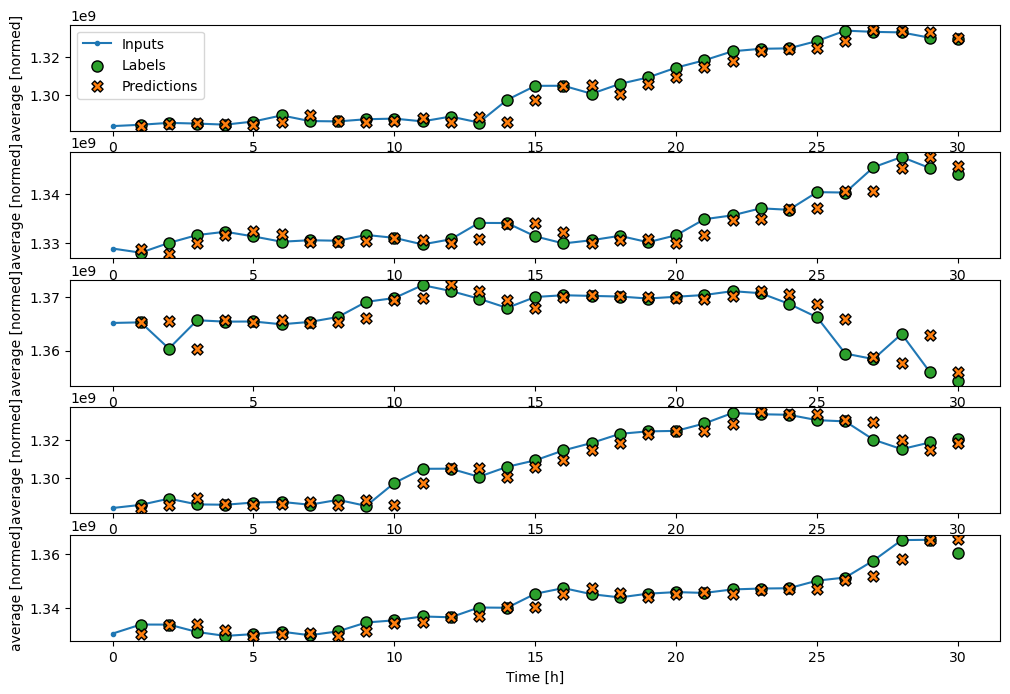

In [ ]:
single_step_window.plot(linear)